In [67]:
import subprocess
import random
from typing import Union,List

In [4]:
print (\x6C5CEC9)

SyntaxError: unexpected character after line continuation character (Temp/ipykernel_1788/2607075840.py, line 1)

In [85]:
class Runner:
    PASS = "PASS"
    FAIL = "FAIL"
    UNRESLOVED = "RESELOVED"

    def __init__(self) -> None:
        pass
    def run(self,inp:str):
        return (inp,Runner.UNRESLOVED)

class ProgramRunner(Runner):
    def __init__(self,program: Union[str,List[str]]):
        self.program = program
    def run_process(self,inp:str = ""):
        return subprocess.run(self.program,
                              input = inp,
                              stdout = subprocess.PIPE,
                              stderr = subprocess.PIPE,
                              universal_newlines=True,
                              shell=True
                              )
    def run(self,inp:str = ""):
        result = self.run_process(inp)
        
        if result.returncode == 0:
            outcome = self.PASS
        elif result.returncode < 0:
            outcome = self.FAIL
        else:
            outcome = self.UNRESLOVED
        return (result, outcome)
    

class BinaryProgramRunner(ProgramRunner):
    def run_process(self, inp: str = "") -> subprocess.CompletedProcess:
        """Run the program with `inp` as input.  
           Return result of `subprocess.run()`."""
        return subprocess.run(self.program,
                              input=inp.encode(),
                              stdout=subprocess.PIPE,
                              stderr=subprocess.PIPE)

In [69]:
class Fuzzer:
    def __init__(self) -> None:
        pass
    def fuzz(self) -> str:
        return
    def run(self,runner:Runner = Runner()):
        return runner.run(self.fuzz())
    def runs(self,runner:Runner = Runner(),trials:int = 10):
        return [self.run(runner) for i in range(trials)]
    
class RandomFuzzer(Fuzzer):
    def __init__(self,min_length:int = 20,max_length:int = 20,
                 char_start:int = 32,char_range:int = 32):
        self.minlen = min_length
        self.maxlen = max_length
        self.start = char_start
        self.range = char_range

    def fuzz(self):
        string_len = random.randrange(self.minlen,self.maxlen+1)
        out = ""
        for i in range(0,string_len):
            out +=chr(random.randrange(self.start,self.start+self.range))
        return out


In [70]:
random_fuzzer = RandomFuzzer(min_length=20, max_length=20)
for i in range(10):
    print(random_fuzzer.fuzz())

5)#2;6#5<$")3+)99333
"50#0>8=3 <$0'+!-?,"
95!$7'>(2-9/&%"2'%->
1< .&'2+''31"1*"-./2
!69?/5$39, +-7(%)62!
130>4)3;9,37>,.-%+?1
">9$1,)'?:-;%&)6>*<4
08);6&)?(!$?" -%<**!
4/3/>#/!8"(:78*10=<1
<$9 !0=96;,$326)17=1


In [71]:
cat = ProgramRunner(program='cat')
cat.run('hello')

(CompletedProcess(args='cat', returncode=0, stdout='hello', stderr=''), 'PASS')

In [72]:
random_fuzzer.run(cat)

(CompletedProcess(args='cat', returncode=0, stdout='?>15"/;24<9=0:!*><,1', stderr=''),
 'PASS')

In [73]:
inp = random_fuzzer.fuzz()
cat.run(inp)

(CompletedProcess(args='cat', returncode=0, stdout='*19$ -9.48 8 ):;8=50', stderr=''),
 'PASS')

In [74]:
#Exercise 2:Run Simulated Troff
class TroffRunner(Runner):
    def __init__(self):
        self.f1_failures = 0
        self.f2_failures = 0
        self.f3_failures = 0
    
    def f1(self,s: str):
        index = s.find('\\D')
        while(index != -1):
            assert s[index+2:index+3].isprintable()
            s = s[index+2:]
            index = s.find('\\D')
        return True
    
    def f2(self,s: str):
        for i in range(len(s)-1):
            if ord(s[i]) >= 128 and ord(s[i]) <= 255:
                assert s[i+1:i+3] == '\n'
        return True

    def f3(self,s: str):
        assert s != ".\n"
        return True
    
    def run(self,inp:str):
        try:
            self.f1(inp)
        except AssertionError:
            self.f1_failures +=1

        try:
            self.f2(inp)
        except AssertionError:
            self.f2_failures +=1

        try:
            self.f3(inp)
        except AssertionError:
            self.f3_failures +=1

        return inp

    


In [79]:
troff_fuzzer = RandomFuzzer(char_start=0, char_range=256,min_length=1 ,max_length=20)
troff_runner = TroffRunner()

In [80]:
troff_fuzzer.runs(troff_runner, trials=100000)


['Àèõ\x05a',
 'E\x97gxt\x936\x82',
 'CÎ\x89\x84@\x12\x1a0D×¬Uõg£rp',
 '`\x19\r?F°f',
 '¾KÛLA?Ø§|\x8bÖ{{|ðJ÷òú',
 '\x10>\x0fë\num.\x8cÓã½',
 '½Î',
 '\x92/{kÚªÉaü\x12\x93¬',
 '<*U19S¤\xadÒ.\x0f¹\x8dîÄ´',
 '\x0cì\x19+$·o¨PMe\x0c\x0f\x1a®Î]Ë<',
 'Ô\xad',
 "LLÊ¢b\x1b¶\x88À©´\x1c«iÑtá'#",
 '¾',
 'î\x11TM\x10\x96Â<\x81b%¤IWíZ\x8b',
 'çÞdI\x8aS\x18*Ê8jC#\x80\x86\x8fËÓ',
 '[dZ#ó\x01Úèð\x9b',
 '¼\x01',
 '\x04\x05ÈÆ\x86À\x02',
 '6UÑC¸\x96\x8chÊ]\x0f%êg',
 'Fk>"-Rý¼½c¤\x12\x8a',
 'Jí+~éSñ§L',
 '\x99f\x93',
 '\x05§=\x1a#\x1a\x9a\x89ýî',
 'j]Õ×\x930áÝQ',
 '\x90;Z×r=OK1\x83þ\x87z\x14.px¥',
 '\x0byüÖÈQÙµ\x00²\x880\x83Öîã\x10\x9e\x08',
 'úIö}@¼&\x03õ\x86ÈñbRqóO±\x8d',
 'üÙR\x00g',
 'Ì\x0b3T|Õ\x8c;\x04ª4Ê|ÕpÈ{\x08',
 'ûå(´Îw',
 'lEÐ,"\x99\x94 \x96\x14\x17¹ò\x1f\x9c\x1b\x97',
 'óÊ\x10',
 'A¹9Þ\x00Ï\x9f~V\x18\x9d£',
 's',
 '~aÒU\x0643ê=&Å',
 'Ñ\x14*µ÷²£¤¥-\\',
 '×²}}u\x12\x19\x13Æ\x1bnAA\x9cºA\x84X\x1e\x1b',
 'ôÅ\x17æ\x8dÌ¶\x83í\x05ïø\x8dU',
 'txî£¿üF*ØèÞ¥_',
 '®XPÉ\tG%SvMå\x00\x08ô',
 'bD\x94çÕTy\x7fô\x9

[5, 90030, 0]


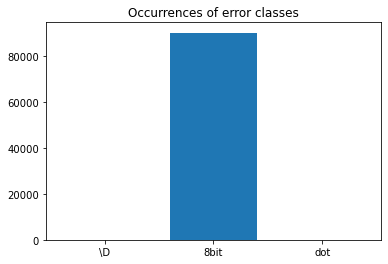

In [81]:
%matplotlib inline
ys = [troff_runner.f1_failures,
      troff_runner.f2_failures,
      troff_runner.f3_failures]

import matplotlib.pyplot as plt
plt.bar(["\\D", "8bit", "dot"], ys)
plt.title("Occurrences of error classes");
print(ys)

In [86]:
#Exercise 3:Run Real Troff
real_troff_runner = BinaryProgramRunner("troff")
for i in range(100):
    result, outcome = random_fuzzer.run(real_troff_runner)
    if outcome == Runner.FAIL:
        print(result)
